***Import Libraries***

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

***Load in Pokemon CSV File***

In [2]:

#Had to ask gpt for help as there was an encoding error when reading the file
pokeFrame = pd.read_csv('pokemon.csv', encoding="latin1")


#Make sure it loaded correctly
pokeFrame.head()



,Pokedex Number,Pokemon Name,Classification,Legendary Type,Height,Weight,Primary Type,Secondary Type,Primary Ability,Primary Ability Description,...,Special Defense Base Stat,Speed Base Stat,Primary Egg Group,Secondary Egg Group,Cycle Count,Pre-Evolution Pokedex Number,Evolution Method,Evolution Details,Original Pokemon,Form Name
0,1,Bulbasaur,Seed Pokemon,NaN,0.7,6.9,Grass,Poison,Overgrow,Powers up Grass-type moves when the Pokemon's ...,...,65,45,Monster,Grass,20,NaN,NaN,NaN,NaN,NaN
1,2,Ivysaur,Seed Pokemon,NaN,1.0,13.0,Grass,Poison,Overgrow,Powers up Grass-type moves when the Pokemon's ...,...,80,60,Monster,Grass,20,1,Level Up,Level 16,NaN,NaN
2,3,Venusaur,Seed Pokemon,NaN,2.0,100.0,Grass,Poison,Overgrow,Powers up Grass-type moves when the Pokemon's ...,...,100,80,Monster,Grass,20,2,Level Up,Level 32,NaN,NaN
3,252,Treecko,Wood Gecko Pokemon,NaN,0.5,5.0,Grass,NaN,Overgrow,Powers up Grass-type moves when the Pokemon's ...,...,55,70,Monster,Dragon,20,NaN,NaN,NaN,NaN,NaN
4,253,Grovyle,Wood Gecko Pokemon,NaN,0.9,21.6,Grass,NaN,Overgrow,Powers up Grass-type moves when the Pokemon's ...,...,65,95,Monster,Dragon,20,252,Level Up,Level 16,NaN,NaN


***Choose five features to analyze***

In [3]:

#The five features I have chosen to analyze
features = pokeFrame[['Height', 'Weight', 'Primary Type', 'Secondary Type', 'Games of Origin']]


print(features[['Height', 'Weight']].describe())
print(features.info())

          Height      Weight
count  927.00000  927.000000
mean     1.26246   69.078209
std      1.30101  126.450808
min      0.10000    0.100000
25%      0.60000    9.200000
50%      1.00000   29.000000
75%      1.50000   69.100000
max     14.50000  999.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Height           927 non-null    float64
 1   Weight           927 non-null    float64
 2   Primary Type     927 non-null    object 
 3   Secondary Type   494 non-null    object 
 4   Games of Origin  927 non-null    object 
dtypes: float64(2), object(3)
memory usage: 36.3+ KB
None


***Show histograms of the height and weight***

array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

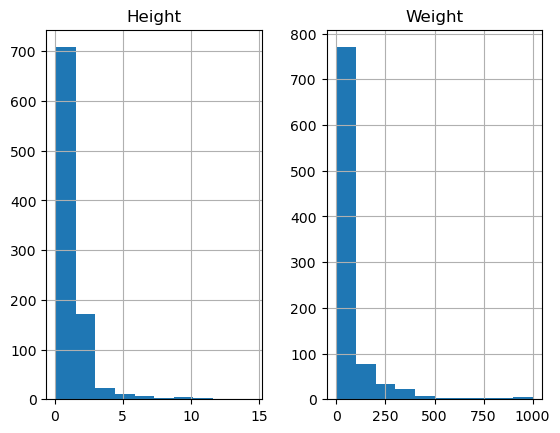

In [4]:

#Draw histograms of both the height and weight since they are numerical
features[['Height', 'Weight']].hist()

As you can see there are some very noticeable outliers for both stats but they tend to stay very close to a more reasonable number

***Show the most common games of origin***

<Axes: title={'center': 'Distribution of Games of Origin'}, xlabel='Games of Origin'>

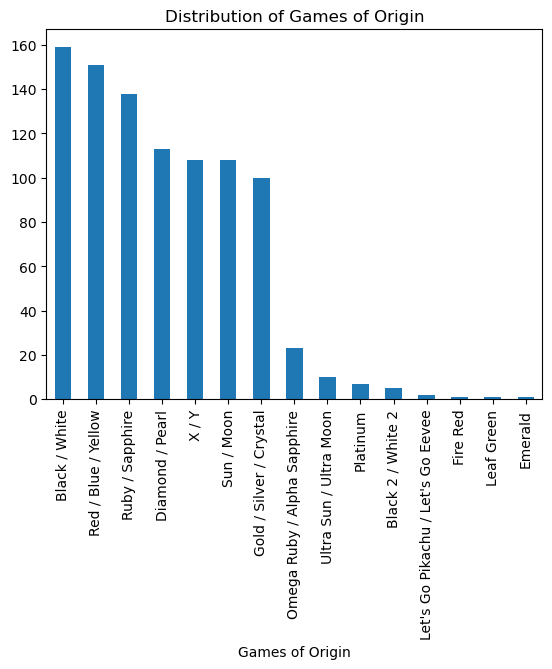

In [5]:
#Draw bar graph for games of origin
features['Games of Origin'].value_counts().plot(kind='bar', title='Distribution of Games of Origin')

Interestingly the gen 5 games added more new pokemon than the originals

***Show info about primary and secondary typing***

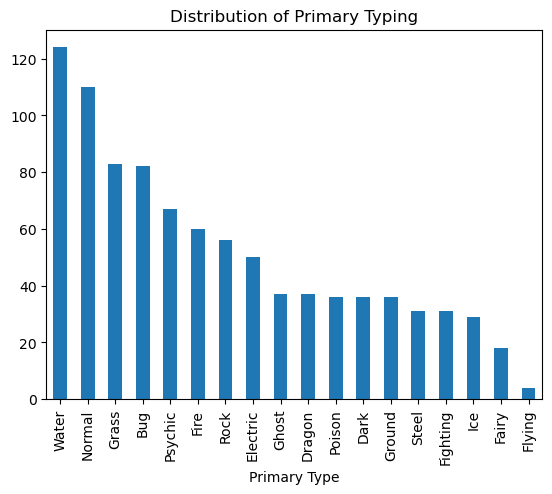

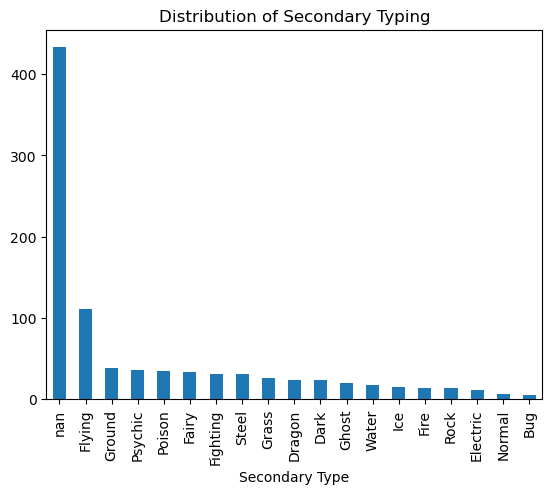

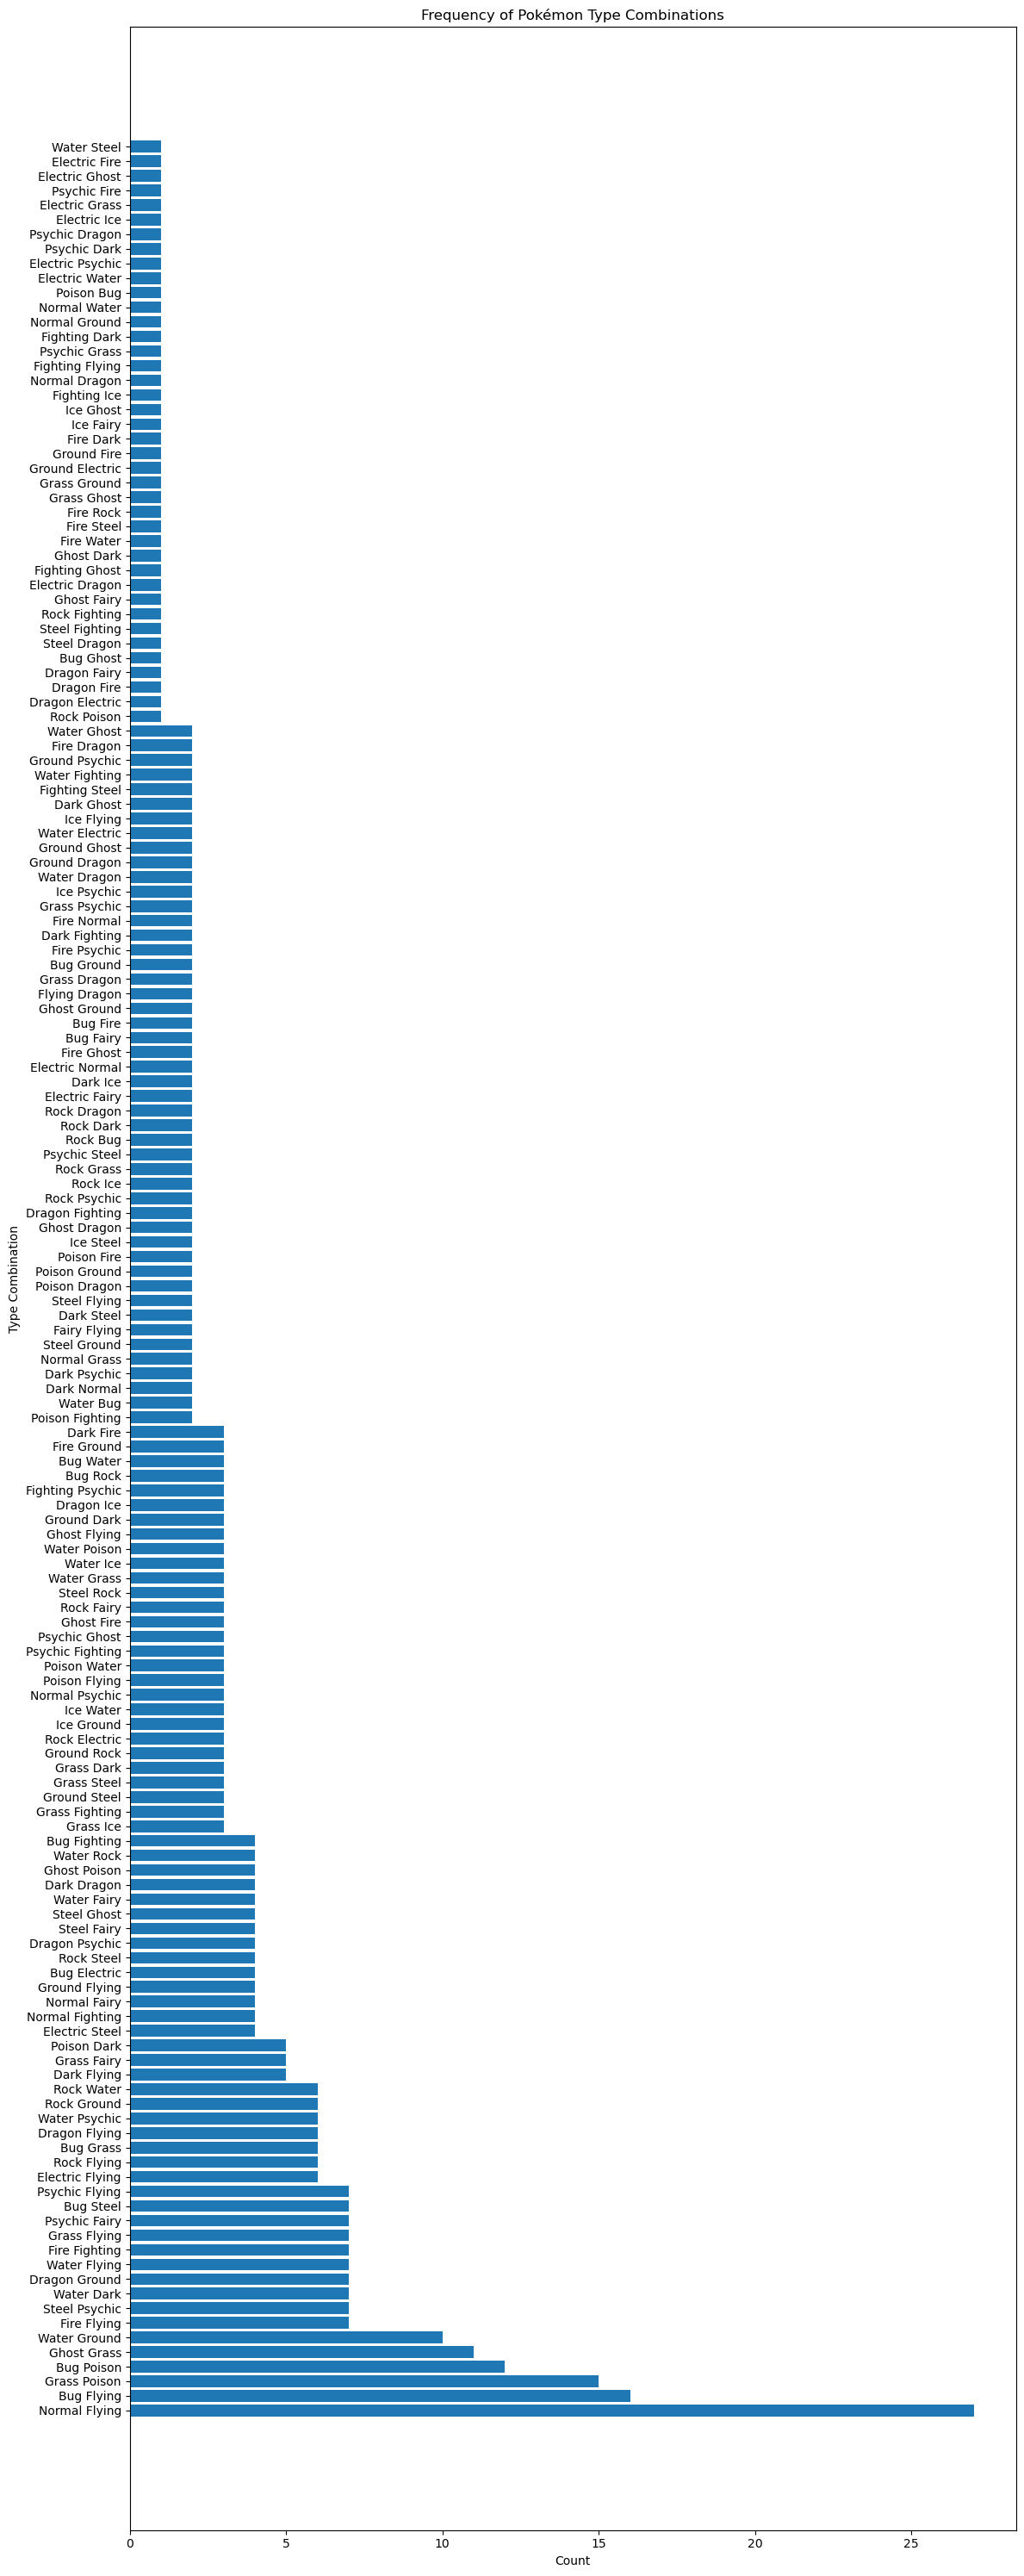

In [6]:
#This shows the distribution of primary type counts
features['Primary Type'].value_counts().plot(kind='bar', title='Distribution of Primary Typing')
plt.show()

#Absolutely love that dropna=false is an option, so awesome
features['Secondary Type'].value_counts(dropna=False).plot(kind='bar', title='Distribution of Secondary Typing')
plt.show()

#Creating a data frame which contains the combos
typeCombos = features.groupby(['Primary Type', 'Secondary Type']).size().reset_index(name="Count")

#Sort for better display
typeCombos.sort_values(by='Count', ascending=False, inplace=True)


#Displaying that many type combos is difficult so I had GPT write this, I still had to edit it after to actually make things readable
plt.figure(figsize=(12, 30))
plt.barh(typeCombos['Primary Type'] + ' ' + typeCombos['Secondary Type'].fillna(''), 
         typeCombos['Count'])
plt.xlabel('Count')
plt.ylabel('Type Combination')
plt.title('Frequency of Pokémon Type Combinations')
plt.tight_layout()
plt.show()

Obviously seeing the distribution of the types individually is cool but even more interesting is seeing how common different type combinations are. Would be better if opposites were combined but it still does the job. Look at how common Normal Flying is!

***Get correlation matrix of all numerical data***

In [7]:

#Get only the numerical data
pokeNumbers = pokeFrame.select_dtypes(include=['float64', 'int64'])

#Create my correlation matrix
pokeCorr = pokeNumbers.corr()



#To find the closest to 0
print(pokeCorr.abs().min())

#Create a heatmap
pokeCorr.style.background_gradient(cmap='coolwarm')



Height                       0.017089
Weight                       0.005466
Male Ratio                   0.001981
Female Ratio                 0.003736
Health EV                    0.006888
Attack EV                    0.002120
Defense EV                   0.001981
Special Attack EV            0.006005
Special Defense EV           0.003736
Speed EV                     0.000294
Catch Rate                   0.000294
Experience Growth Total      0.013322
Experience Yield             0.018629
Base Happiness               0.005612
Health Base Stat             0.008403
Attack Base Stat             0.022253
Defense Base Stat            0.006005
Special Attack Base Stat     0.002120
Special Defense Base Stat    0.024664
Speed Base Stat              0.013822
Cycle Count                  0.024728
Original Pokemon             0.015127
dtype: float64


,Height,Weight,Male Ratio,Female Ratio,Health EV,Attack EV,Defense EV,Special Attack EV,Special Defense EV,Speed EV,Catch Rate,Experience Growth Total,Experience Yield,Base Happiness,Health Base Stat,Attack Base Stat,Defense Base Stat,Special Attack Base Stat,Special Defense Base Stat,Speed Base Stat,Cycle Count,Original Pokemon
Height,1.000000,0.642702,-0.165126,-0.201103,0.104100,0.148610,0.030735,0.163471,0.017089,-0.082543,-0.326175,0.264442,0.495432,-0.356754,0.442418,0.455615,0.378438,0.397422,0.341168,0.174013,0.392907,0.062199
Weight,0.642702,1.000000,-0.206582,-0.266705,0.109945,0.156229,0.187516,0.066528,-0.005466,-0.140534,-0.287542,0.271490,0.437578,-0.426715,0.428633,0.413255,0.466624,0.255867,0.297046,0.028235,0.439558,0.059254
Male Ratio,-0.165126,-0.206582,1.000000,-0.092943,-0.166520,0.083801,0.001981,-0.084910,-0.106987,0.023262,0.041688,-0.181977,-0.261750,0.309896,-0.185723,-0.048543,-0.153981,-0.186566,-0.222048,-0.138792,-0.457164,-0.283510
Female Ratio,-0.201103,-0.266705,-0.092943,1.000000,0.016880,-0.084653,0.009144,-0.200220,-0.003736,-0.005902,0.360023,-0.243806,-0.328712,0.322757,-0.125055,-0.296816,-0.204011,-0.330939,-0.234074,-0.229709,-0.515009,-0.241036
Health EV,0.104100,0.109945,-0.166520,0.016880,1.000000,-0.189908,-0.144446,-0.154329,-0.120933,-0.154012,-0.062831,0.050877,0.150328,0.006888,0.499442,-0.022253,-0.027597,0.014322,0.052221,-0.070370,0.156981,0.112353
Attack EV,0.148610,0.156229,0.083801,-0.084653,-0.189908,1.000000,-0.202250,-0.205496,-0.183959,-0.235962,-0.171854,0.126117,0.229218,-0.114406,0.170857,0.591903,0.074729,0.002120,-0.024664,0.080850,0.064730,0.089526
Defense EV,0.030735,0.187516,0.001981,0.009144,-0.144446,-0.202250,1.000000,-0.183443,-0.053005,-0.185629,-0.080840,0.013322,0.036753,-0.018413,-0.083103,0.029375,0.572870,-0.162474,0.031000,-0.251237,-0.024728,-0.036793
Special Attack EV,0.163471,0.066528,-0.084910,-0.200220,-0.154329,-0.205496,-0.183443,1.000000,-0.122631,-0.161261,-0.200889,0.144015,0.312099,-0.139740,0.078662,0.042512,0.006005,0.619734,0.223285,0.182228,0.222575,0.022467
Special Defense EV,0.017089,-0.005466,-0.106987,-0.003736,-0.120933,-0.183959,-0.053005,-0.122631,1.000000,-0.149626,-0.137420,-0.044050,0.134764,-0.005612,0.008403,-0.129563,0.115541,0.071846,0.495653,-0.022205,0.062158,-0.071645
Speed EV,-0.082543,-0.140534,0.023262,-0.005902,-0.154012,-0.235962,-0.185629,-0.161261,-0.149626,1.000000,0.000294,-0.071211,0.018629,0.072458,-0.120068,-0.070918,-0.188373,0.017378,-0.100221,0.507946,-0.046867,-0.085399


***Plot the two strongest correlation pairs***

<Axes: title={'center': 'Strongest Negative Correlation'}, xlabel='Experience Yield', ylabel='Catch Rate'>

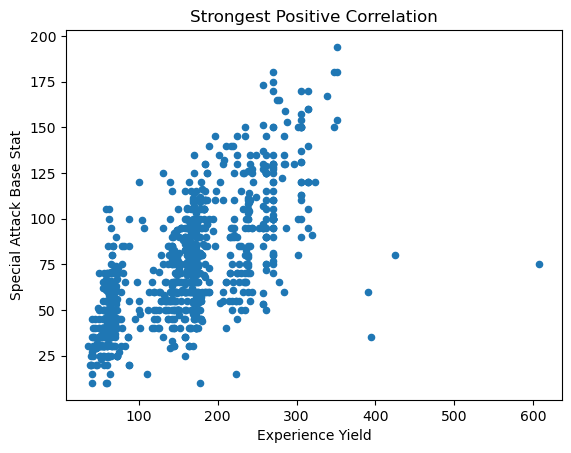

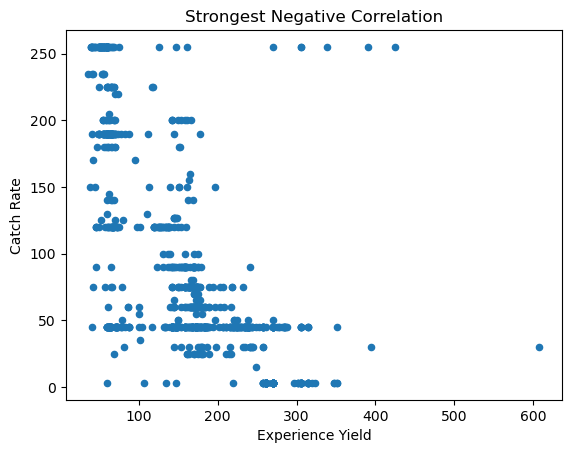

In [8]:
#Create scatter plots for both

pokeNumbers.plot.scatter(x='Experience Yield', y='Special Attack Base Stat', title='Strongest Positive Correlation')

pokeNumbers.plot.scatter(x='Experience Yield', y='Catch Rate', title='Strongest Negative Correlation')

It's likely that the correlation between special attack base stat and experience yield is purely coincidental, or is otherwise caused by an outside factor. The correlation between catch rate and experience yield however does make sense as more difficult pokemon tend to be both harder to catch and worth more exp.

***Plot the weakest correlation pair***

<Axes: title={'center': 'Weakest Correlation'}, xlabel='Speed EV', ylabel='Catch Rate'>

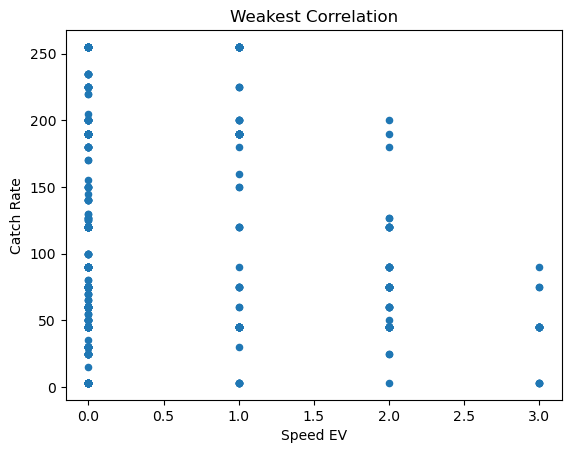

In [9]:
#One last scatter plot
pokeNumbers.plot.scatter(x='Speed EV', y='Catch Rate', title='Weakest Correlation')

Clearly the Speed EV and Catch Rate are completely unrelated, to the point of having a correlation within the ten thousandths place of 0